In [3]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.linear_model import LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
%matplotlib inline

# SFS selection after filter method

In [4]:
%store -r X_collinear_Variance_MI #read the features and labels data after filter method
%store -r y

no stored variable #read the features and labels data after filter method


In [5]:
X_collinear_Variance_MI.head()

,TemperatureC,IS_WEEKEND(timestamp),Sea Level PressurehPa / TemperatureC,seasonal_num / TemperatureC,TemperatureC / seasonal_num,Dew PointC * seasonal_num,seasonal_num * TemperatureC,ABSOLUTE(TemperatureC),Humidity * TemperatureC / seasonal_num,Sea Level PressurehPa * seasonal_num / Dew PointC,...,Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,seasonal_num - TemperatureC / Humidity,ABSOLUTE(Dew PointC) - ABSOLUTE(TemperatureC),TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC / Humidity - seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,ABSOLUTE(Dew PointC) - TemperatureC
0,3.9,False,258.282051,0.256410,3.9,3.9,3.9,3.9,390.0,258.282051,...,6.173000,1003.4,0.961000,0.0,1283.1,-0.961000,0.0,922.684615,1003.4,0.0
1,4.4,False,228.840909,0.227273,4.4,3.3,4.4,4.4,409.2,305.121212,...,6.426882,1002.5,0.952688,-1.1,1491.6,-0.964516,-102.3,929.627273,1002.5,-1.1
2,3.9,False,258.051282,0.256410,3.9,3.9,3.9,3.9,390.0,258.051282,...,6.164000,1002.5,0.961000,0.0,1244.1,-0.961000,0.0,924.348718,1002.5,0.0
3,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5
4,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5


In [6]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


In [7]:
start = time.time()

rf_r = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
sfs1 = SFS(rf_r, k_features=20, forward=True, floating=False, verbose=2, 
           scoring='neg_mean_squared_error', cv=0, n_jobs=-1)#choose 20 features
sfs1 = sfs1.fit(X_collinear_Variance_MI, y)

end = time.time()

elapsed = end - start 
print('Time for SFS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.0min finished

[2019-07-18 18:07:02] Features: 1/20 -- score: -159.63342408498346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:  3.8min finished

[2019-07-18 18:10:49] Features: 2/20 -- score: -106.5061343339873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:  5.5min finished

[2019-07-18 18:16:21] Features: 3/20 -- score: -72.47134075427203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  67 

Time for SFS:03:51:08


[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed: 18.7min finished

[2019-07-18 21:56:09] Features: 20/20 -- score: -46.61420562342282

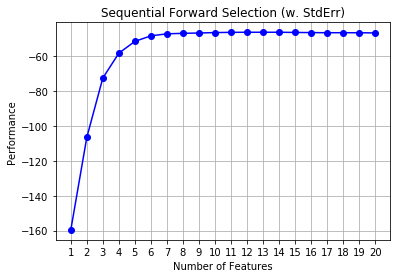

In [8]:
# Plotting the results
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [10]:
X_collinear_Variance_MI_sfs = sfs1.transform(X_collinear_Variance_MI)
X_collinear_Variance_MI_sfs.shape

(8760, 20)

In [11]:
# Visualizing the results in DataFrames
# features selected after the 8th iteration add no more predictive power
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,-159.633,NaN,[-159.63342408498346],"(29,)",(Sea Level PressurehPa / Humidity * Temperatur...,0,NaN
2,-106.506,NaN,[-106.5061343339873],"(23, 29)",(Sea Level PressurehPa / Dew PointC * Sea Leve...,0,NaN
3,-72.4713,NaN,[-72.47134075427203],"(1, 23, 29)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
4,-58.225,NaN,[-58.224981210572594],"(1, 23, 29, 67)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
5,-51.4541,NaN,[-51.454072031201186],"(1, 23, 29, 61, 67)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
6,-48.2816,NaN,[-48.28164370162521],"(1, 23, 29, 61, 64, 67)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
7,-47.1271,NaN,[-47.12712512101958],"(1, 23, 29, 55, 61, 64, 67)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
8,-46.8432,NaN,[-46.84317330246437],"(1, 23, 29, 43, 55, 61, 64, 67)","(IS_WEEKEND(timestamp), Sea Level PressurehPa ...",0,NaN
9,-46.6497,NaN,[-46.64965647936513],"(1, 5, 23, 29, 43, 55, 61, 64, 67)","(IS_WEEKEND(timestamp), Dew PointC * seasonal_...",0,NaN
10,-46.4169,NaN,[-46.416915033250525],"(1, 5, 23, 29, 43, 50, 55, 61, 64, 67)","(IS_WEEKEND(timestamp), Dew PointC * seasonal_...",0,NaN


In [17]:
# take a look at the selected feature indices at each step
sfs1.subsets_

{1: {'feature_idx': (29,),
  'cv_scores': array([-159.63342408]),
  'avg_score': -159.63342408498346,
  'feature_names': ('Sea Level PressurehPa / Humidity * TemperatureC / Humidity',)},
 2: {'feature_idx': (23, 29),
  'cv_scores': array([-106.50613433]),
  'avg_score': -106.5061343339873,
  'feature_names': ('Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num',
   'Sea Level PressurehPa / Humidity * TemperatureC / Humidity')},
 3: {'feature_idx': (1, 23, 29),
  'cv_scores': array([-72.47134075]),
  'avg_score': -72.47134075427203,
  'feature_names': ('IS_WEEKEND(timestamp)',
   'Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num',
   'Sea Level PressurehPa / Humidity * TemperatureC / Humidity')},
 4: {'feature_idx': (1, 23, 29, 67),
  'cv_scores': array([-58.22498121]),
  'avg_score': -58.224981210572594,
  'feature_names': ('IS_WEEKEND(timestamp)',
   'Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num',
   'Sea Lev

In [27]:
# selected feaures
sfs1.k_feature_names_

('TemperatureC',
 'IS_WEEKEND(timestamp)',
 'seasonal_num / TemperatureC',
 'TemperatureC / seasonal_num',
 'Dew PointC * seasonal_num',
 'ABSOLUTE(TemperatureC)',
 'Sea Level PressurehPa * seasonal_num / Dew PointC',
 'Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num',
 'Sea Level PressurehPa / Humidity * TemperatureC / Humidity',
 'Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / TemperatureC',
 'Sea Level PressurehPa / seasonal_num - Sea Level PressurehPa / TemperatureC',
 'Sea Level PressurehPa - seasonal_num * TemperatureC',
 'Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / Dew PointC',
 '1 / seasonal_num - TemperatureC / seasonal_num',
 'Sea Level PressurehPa / Dew PointC - Sea Level PressurehPa / seasonal_num',
 'Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num',
 'TemperatureC * WindDirDegrees - TemperatureC / seasonal_num',
 'Dew PointC / Humidity - seasonal_num',
 'Sea Level PressurehPa * seasonal_num - W

In [20]:
sfs1.k_feature_idx_

(0, 1, 3, 4, 5, 7, 9, 23, 29, 43, 45, 50, 51, 52, 55, 61, 64, 65, 67, 68)

In [33]:
X_collinear_Variance_MI_sfs = pd.DataFrame(X_collinear_Variance_MI_sfs)

In [42]:
# add the column names back to the df
X_collinear_Variance_MI_sfs.columns = sfs1.k_feature_names_

In [71]:
# transformed with all prescribed 20 features
X_collinear_Variance_MI_sfs.head()

,TemperatureC,IS_WEEKEND(timestamp),seasonal_num / TemperatureC,TemperatureC / seasonal_num,Dew PointC * seasonal_num,ABSOLUTE(TemperatureC),Sea Level PressurehPa * seasonal_num / Dew PointC,Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num,Sea Level PressurehPa / Humidity * TemperatureC / Humidity,Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa / seasonal_num - Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / Dew PointC,1 / seasonal_num - TemperatureC / seasonal_num,Sea Level PressurehPa / Dew PointC - Sea Level PressurehPa / seasonal_num,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC / Humidity - seasonal_num,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num
0,3.9,False,0.25641,3.9,3.9,3.9,258.282,260168,0.392847,749.018,749.018,1003.4,749.018,-2.9,-749.018,1003.4,1283.1,-0.961,922.685,1003.4
1,4.4,False,0.227273,4.4,3.3,4.4,305.121,307227,0.51224,778.059,778.059,1002.5,701.779,-3.4,-701.779,1002.5,1491.6,-0.964516,929.627,1002.5
2,3.9,False,0.25641,3.9,3.9,3.9,258.051,259703,0.392496,748.349,748.349,1002.5,748.349,-2.9,-748.349,1002.5,1244.1,-0.961,924.349,1002.5
3,3.3,False,0.30303,3.3,2.8,3.3,359.464,361801,0.353008,701.5,701.5,1003.2,647.036,-2.3,-647.036,1003.2,1052.7,-0.971134,909.53,1003.2
4,3.3,False,0.30303,3.3,2.8,3.3,359.464,361801,0.353008,701.5,701.5,1003.2,647.036,-2.3,-647.036,1003.2,1052.7,-0.971134,909.53,1003.2


In [72]:
# select only 8 features since later features add no predictive power
# feature index are obtained from the results dataframe
X_collinear_Variance_MI.iloc[:, [1, 23, 29, 43, 55, 61, 64, 67]].head()

,IS_WEEKEND(timestamp),Sea Level PressurehPa / Dew PointC * Sea Level PressurehPa / seasonal_num,Sea Level PressurehPa / Humidity * TemperatureC / Humidity,Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa / Dew PointC - Sea Level PressurehPa / seasonal_num,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC
0,False,260167.510256,0.392847,749.017949,-749.017949,1003.4,1283.1,922.684615
1,False,307226.548485,0.512240,778.059091,-701.778788,1002.5,1491.6,929.627273
2,False,259702.810256,0.392496,748.348718,-748.348718,1002.5,1244.1,924.348718
3,False,361800.803571,0.353008,701.500000,-647.035714,1003.2,1052.7,909.530303
4,False,361800.803571,0.353008,701.500000,-647.035714,1003.2,1052.7,909.530303
